Importo las librerias necesarias, incluyendo las de preprocesamiento, entrenamiento y evaluación.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
)


In [2]:
df= pd.read_csv("EMG_Features.csv")
df

,RMS_Biceps,MAV_Biceps,VAR_Biceps,ZC_Biceps,IMEG_Biceps,MEANF_Biceps,MDF_Biceps,SPECTRAL_ENT_Biceps,RMS_Triceps,MAV_Triceps,VAR_Triceps,ZC_Triceps,IMEG_Triceps,MEANF_Triceps,MDF_Triceps,SPECTRAL_ENT_Triceps,Target
0,0.000054,0.000046,2.877636e-09,13,0.009216,55.919464,60.0,1.392794,0.000161,0.000133,2.598678e-08,12,0.026583,60.653539,60.0,0.999155,0.0
1,0.000035,0.000026,1.200250e-09,13,0.005259,39.733812,40.0,2.053394,0.000078,0.000057,6.025554e-09,19,0.011488,64.800248,60.0,1.333861,0.0
2,0.000016,0.000013,2.643661e-10,15,0.002686,67.755072,50.0,2.664580,0.000031,0.000024,9.077925e-10,22,0.004893,110.965196,60.0,2.145303,0.0
3,0.000024,0.000016,5.428025e-10,16,0.003242,43.452541,40.0,2.118086,0.000033,0.000028,1.101355e-09,16,0.005670,80.712859,60.0,1.535873,0.0
4,0.000023,0.000015,4.815328e-10,16,0.002972,58.452967,60.0,2.448056,0.000038,0.000034,1.411730e-09,12,0.006775,74.454843,60.0,1.432573,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12413,0.000118,0.000084,1.383804e-08,16,0.016724,44.779334,40.0,2.248886,0.000406,0.000295,1.648139e-07,11,0.058963,73.001348,80.0,2.294145,1.0
12414,0.000072,0.000054,5.112447e-09,19,0.010888,49.540454,30.0,2.211320,0.000290,0.000194,8.184051e-08,11,0.038831,47.272126,50.0,1.968698,1.0
12415,0.000087,0.000069,7.562360e-09,18,0.013798,85.696916,90.0,2.325793,0.000196,0.000146,3.807773e-08,14,0.029117,75.684680,80.0,2.435941,1.0
12416,0.000092,0.000078,8.525652e-09,14,0.015602,80.356192,80.0,2.536613,0.000234,0.000181,5.437050e-08,16,0.036139,52.743481,40.0,2.276363,1.0


Luego de realizar el correspondiente EDA y concluir que es util realizar un PCA, continuamos el proceso y el siguiente paso es separar nuestros datos y crear un pipepline, en el cual hagamos una normalización de los datos y apliquemos el PCA. El pipeline solo tendrá estos pasos ya que la idea es que se aplique a varios modelos.

**DIVISIÓN DE LOS DATOS**

In [3]:
X = df.drop(columns=['Target'])
y = df['Target']

print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12413    1.0
12414    1.0
12415    1.0
12416    1.0
12417    1.0
Name: Target, Length: 12418, dtype: float64


In [4]:
#Hago una división de datos 70-15-15
X_train, X_treinta, y_train, y_treinta = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
    )
X_val, X_test, y_val, y_test = train_test_split(
    X_treinta, y_treinta, test_size=0.50, random_state=42, stratify=y_treinta
)

In [5]:
print("Tamaños:")
print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Tamaños:
Train: (8692, 16) (8692,)
Val: (1863, 16) (1863,)
Test: (1863, 16) (1863,)


**PIPELINE DE PROCESAMIENTO **



In [6]:


# Pipeline de escalado y el PCA
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))   #Para que nos de el 95% de varianza
])

# Ajustar EL PIPELINE con train, se hace solo con este porque como sabemos se puede sesgar
pipeline_pca.fit(X_train)

# Transformar cada conjunto
X_train_pca = pipeline_pca.transform(X_train)
X_val_pca   = pipeline_pca.transform(X_val)
X_test_pca  = pipeline_pca.transform(X_test)

# Varianza explicada
pca = pipeline_pca.named_steps['pca']
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

print("\nVarianza explicada acumulada:",
      pca.explained_variance_ratio_.sum())


Varianza explicada por cada componente:
[0.37144445 0.20124968 0.14981568 0.08190279 0.05673402 0.04973711
 0.03248761 0.02660736]

Varianza explicada acumulada: 0.9699787024598474


In [10]:
# ===========================
# 1. Crear el modelo de SVM
# ===========================
svm_model = SVC(
    kernel='rbf',       # kernel más común para EMG
    C=1.0,              # regularización
    gamma='scale',      # valor recomendado
    probability=True    # por si luego quieres ROC o probabilidades
)

# ===========================
# 2. Entrenar el modelo
# ===========================
svm_model.fit(X_train_pca, y_train)

# ===========================
# 3. Validación (opcional)
# ===========================
y_val_pred = svm_model.predict(X_val_pca)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Accuracy en validación: {val_acc:.4f}")

# ===========================
# 4. Evaluación en test
# ===========================
y_test_pred = svm_model.predict(X_test_pca)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en test: {test_acc:.4f}")


Accuracy en validación: 0.9351
Accuracy en test: 0.9340


**AHORA HACEMOS EL ANÁLISIS DE RESULTADOS**

In [11]:
def evaluar_svm_train_val_test_final(
        modelo,
        X_train, y_train,
        X_val,   y_val,
        X_test,  y_test,
        nombre="SVM",
        threshold=0.5
):
    """
    Replica EXACTAMENTE las métricas de la función original evaluar_train_val_test_final(),
    adaptada para modelos sklearn como SVM.
    """

    resultados = {}

    # ===============================
    # Función para calcular cross-entropy
    # ===============================
    def cross_entropy(y, y_proba):
        eps = 1e-10
        y_proba = np.clip(y_proba, eps, 1 - eps)
        return -np.mean(y * np.log(y_proba) + (1 - y) * np.log(1 - y_proba))

    # ===============================
    # Función para evaluar cada split
    # ===============================
    def _eval_split(X, y, split_name):
        print(f"\n============== {split_name} ===============")

        # ------ Probabilidades ------
        if hasattr(modelo, "predict_proba"):
            y_proba = modelo.predict_proba(X)[:, 1]
        else:
            # fallback por si fuera otro modelo
            y_proba = modelo.decision_function(X)
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

        # ------ Predicción con umbral ------
        y_pred = (y_proba >= threshold).astype(int)

        # ------ Métricas ------
        loss = cross_entropy(y, y_proba)
        acc = accuracy_score(y, y_pred)
        fpr, tpr, _ = roc_curve(y, y_proba)
        roc_auc = auc(fpr, tpr)
        cm = confusion_matrix(y, y_pred)

        print(f"\nLoss: {loss:.4f} - Accuracy: {acc:.4f} - AUC: {roc_auc:.4f}\n")
        print("Classification Report:")
        print(classification_report(y, y_pred, digits=4))

        # ------ Matriz de Confusión ------
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Pred 0", "Pred 1"],
                    yticklabels=["Real 0", "Real 1"])
        plt.title(f"{nombre} - Matriz de Confusión ({split_name})")
        plt.tight_layout()
        plt.show()

        return {
            "loss": loss,
            "accuracy": acc,
            "auc": roc_auc,
            "cm": cm,
            "fpr": fpr,
            "tpr": tpr,
            "roc_auc": roc_auc
        }

    # ===============================
    # Evaluar los 3 splits
    # ===============================
    res_train = _eval_split(X_train, y_train, "TRAIN")
    res_val   = _eval_split(X_val,   y_val,   "VALIDACIÓN")
    res_test  = _eval_split(X_test,  y_test,  "TEST")

    resultados["train"] = res_train
    resultados["val"]   = res_val
    resultados["test"]  = res_test

    # ===============================
    # TABLA HORIZONTAL (idéntica a la original)
    # ===============================
    tabla = pd.DataFrame({
        "Train": {
            "Loss": res_train["loss"],
            "Accuracy": res_train["accuracy"],
            "AUC": res_train["auc"]
        },
        "Validación": {
            "Loss": res_val["loss"],
            "Accuracy": res_val["accuracy"],
            "AUC": res_val["auc"]
        },
        "Test": {
            "Loss": res_test["loss"],
            "Accuracy": res_test["accuracy"],
            "AUC": res_test["auc"]
        }
    })

    print("\n==== RESUMEN HORIZONTAL DE MÉTRICAS ====\n")
    display(tabla)

    # ===============================
    # Curva ROC comparativa
    # ===============================
    plt.figure(figsize=(7, 6))
    plt.plot(res_train["fpr"], res_train["tpr"],
             label=f"Train (AUC = {res_train['roc_auc']:.3f})")
    plt.plot(res_val["fpr"], res_val["tpr"],
             label=f"Val (AUC = {res_val['roc_auc']:.3f})")
    plt.plot(res_test["fpr"], res_test["tpr"],
             label=f"Test (AUC = {res_test['roc_auc']:.3f})")

    plt.plot([0, 1], [0, 1], "k--", label="Azar (0.5)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{nombre} - ROC Comparativa (Train vs Val vs Test)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return resultados, tabla



============== TRAIN ===============

Loss: 0.1933 - Accuracy: 0.9383 - AUC: 0.9767

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9222    0.9610    0.9412      4466
         1.0     0.9569    0.9143    0.9351      4226

    accuracy                         0.9383      8692
   macro avg     0.9396    0.9377    0.9382      8692
weighted avg     0.9391    0.9383    0.9383      8692



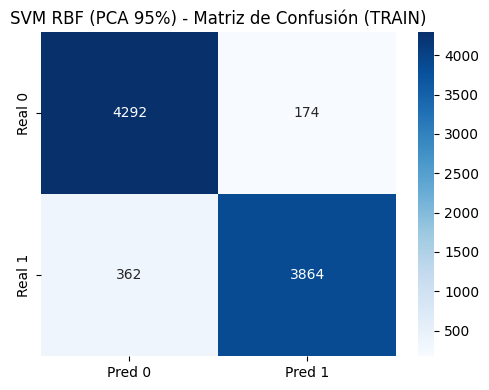


============== VALIDACIÓN ===============

Loss: 0.1736 - Accuracy: 0.9415 - AUC: 0.9806

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9198    0.9707    0.9446       957
         1.0     0.9672    0.9106    0.9380       906

    accuracy                         0.9415      1863
   macro avg     0.9435    0.9407    0.9413      1863
weighted avg     0.9428    0.9415    0.9414      1863



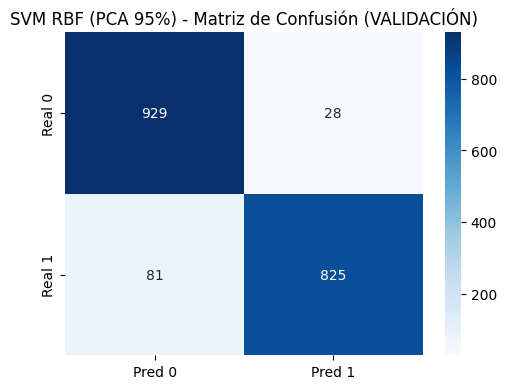


============== TEST ===============

Loss: 0.1825 - Accuracy: 0.9372 - AUC: 0.9803

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9143    0.9687    0.9407       958
         1.0     0.9646    0.9039    0.9333       905

    accuracy                         0.9372      1863
   macro avg     0.9395    0.9363    0.9370      1863
weighted avg     0.9387    0.9372    0.9371      1863



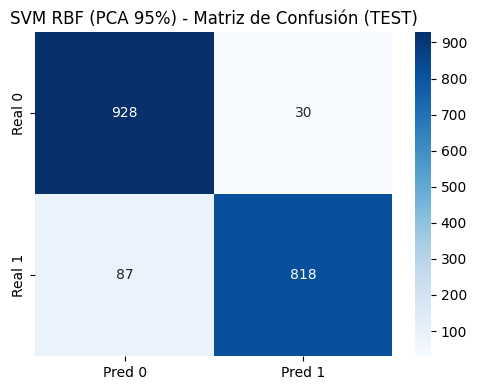


==== RESUMEN HORIZONTAL DE MÉTRICAS ====



,Train,Validación,Test
Loss,0.193330,0.173572,0.182463
Accuracy,0.938334,0.941492,0.937198
AUC,0.976725,0.980611,0.980325


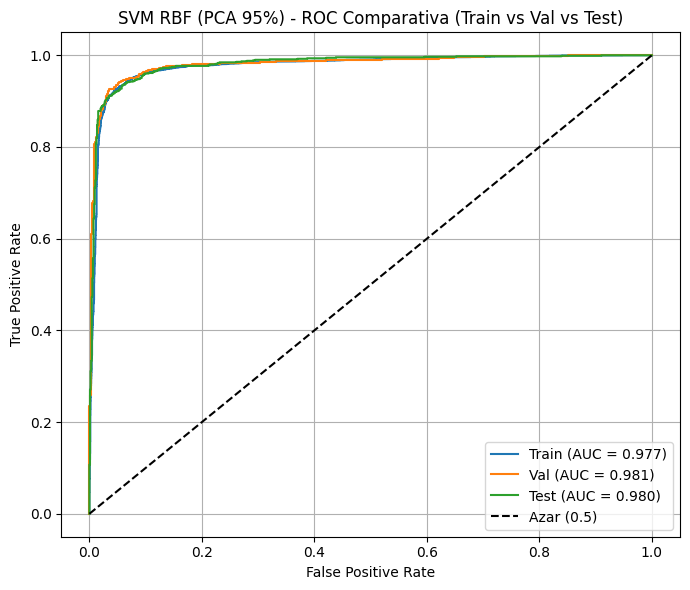

In [9]:
resultados, tabla = evaluar_svm_train_val_test_final(
    svm_model,
    X_train_pca, y_train,
    X_val_pca,   y_val,
    X_test_pca,  y_test,
    nombre="SVM RBF (PCA 95%)",
    threshold=0.5
)
